In [13]:
import numpy as np
import pandas as pd

In [14]:
def load_data(filename):
    #按空格分开
    dataMat = pd.read_csv(filename, header=None, sep='\t')
    #111
    return dataMat

In [15]:
def pca(dataMat, topNfeat=9999):
    '''
    dataMat:输入的数据
    topNfeat:保留的特征值
    '''
    #获取每一列的均值
    dataMat = np.mat(dataMat)
    mean_val = np.mean(dataMat, axis=0)
    mean_val= np.mat(mean_val)
    
    #每个特征减去均值
    data_rm_mean = dataMat - mean_val
    
    #计算协方差矩阵
    covMat = np.cov(data_rm_mean, rowvar=0)
    #计算协方差举证对应的特征值和特征向量
    eig_val, eig_vect = np.linalg.eig(np.mat(covMat))
    
    #特征值排序，然后返回下标
    eig_index = np.argsort(eig_val)
    #自下而上选取n个值
    eig_index = eig_index[:-(topNfeat+1):-1]
    #组成压缩矩阵，即特征向量
    redEigVec = eig_vect[:, eig_index]
    #协方差举证*压缩矩阵,转换为新的空间，维度变为N
    lowMat = (data_rm_mean * redEigVec )  #DX
    #反构原数据
    reMat = (lowMat * redEigVec.T) + mean_val  #DD.TX
    return lowMat, reMat

In [16]:
import matplotlib
import matplotlib.pyplot as plt

In [17]:
dataMat = load_data("testSet.txt")

In [19]:
lowMat, reMat = pca(dataMat, 1)  #1维
# print(lowMat.shape)

In [40]:
dataMat = np.array(dataMat)
lowMat = np.array(lowMat)
reMat = np.array(reMat)

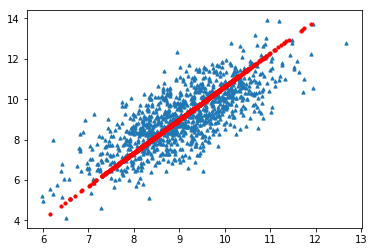

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
#原数据三角，而降维后数据是圆形
ax.scatter(dataMat[:,0],dataMat[:, 1], marker='^', s=10)         #原数据
ax.scatter(reMat[:,0], reMat[:,1], marker='o',s=10, c='red')     #降维复原后的数据
plt.show()